In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load the dataset from Gapminder
df = pd.read_csv('/content/gapminder.csv')

# Display the first few rows of the dataset
display(df.head())

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [11]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing life expectancy values
df.dropna(subset=["lifeExp"], inplace=True)

# Ensure columns have appropriate data types
df["year"] = pd.to_datetime(df["year"], format='%Y')

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64


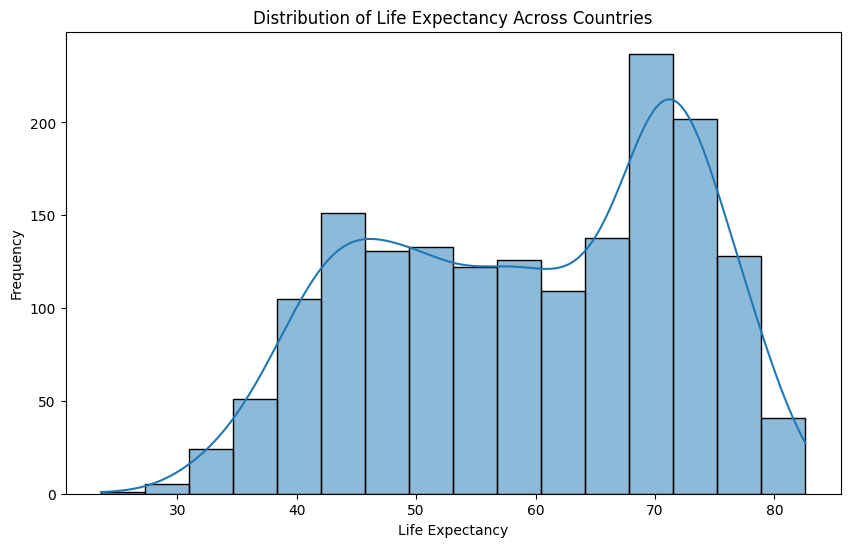

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of life expectancy
plt.figure(figsize=(10,6))
sns.histplot(df['lifeExp'], kde=True)
plt.title('Distribution of Life Expectancy Across Countries')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

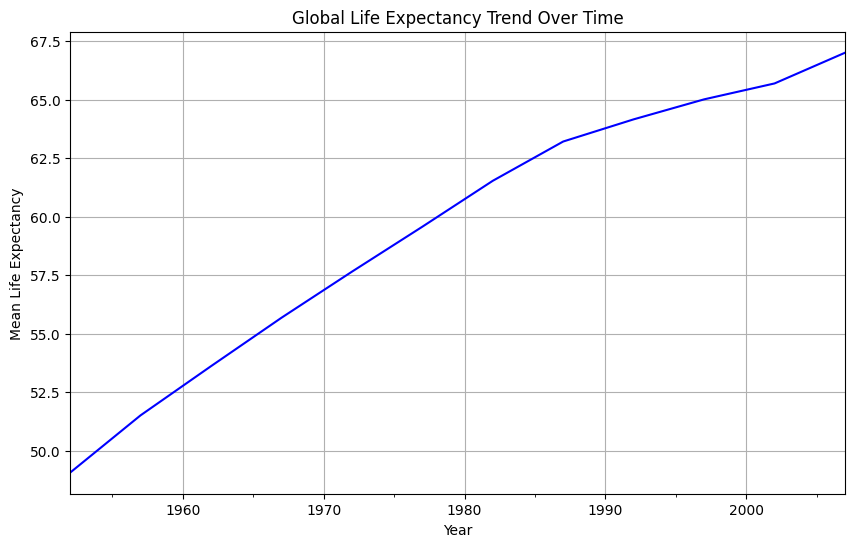

In [13]:
# Group by year and calculate the mean life expectancy
yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()

# Plot life expectancy trend over time
plt.figure(figsize=(10,6))
yearly_life_expectancy.plot(kind='line', color='b')
plt.title('Global Life Expectancy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')
plt.grid(True)
plt.show()

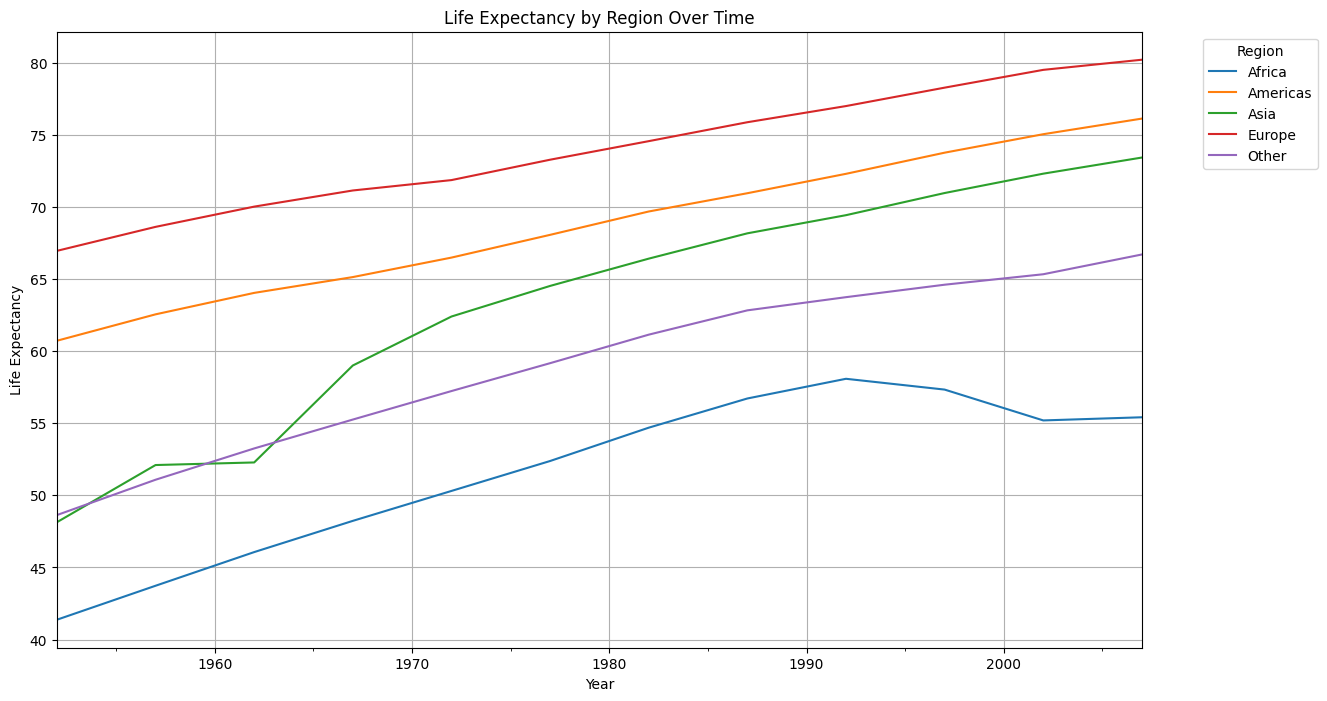

In [14]:
# Add a region column if not available, assuming we have a 'country' column
# You can use a pre-defined mapping or dataset to assign countries to regions.

# Example: Assign regions based on the country (a simplified version)
regions = {
    'Africa': ['Nigeria', 'Kenya', 'South Africa', 'Egypt'],
    'Europe': ['Germany', 'France', 'Italy', 'UK'],
    'Asia': ['China', 'India', 'Japan'],
    'Americas': ['USA', 'Brazil', 'Canada', 'Argentina']
}

def assign_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

df['region'] = df['country'].apply(assign_region)

# Plot average life expectancy by region over time
region_life_expectancy = df.groupby(['year', 'region'])['lifeExp'].mean().unstack()

region_life_expectancy.plot(kind='line', figsize=(14,8))
plt.title('Life Expectancy by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()